   - Find out whether attributes are categorical or numeric.
   - Understand the meaning of each attribute.
   - Look at some summary statistics of each attribute (such as mean, min, max, etc.)
   - Find out the correlations between numerical attributes. Which of them are highly correlated? Is this correlation meaningful? Which of the attributes are highly correlated with the class attribute? You can use boxplots for exploring the relations between categorical attibutes and the class attribute.
   - Find out the percentage of missing data for each attribute.
   - Find out duplicate data if there are any.
   - Plot histograms and box plots of the attributes. These will give an idea about the distribution of the attribute values.
   - Do you think there are any errors or some strange data?
   - Report some interesting findings if you found any.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2
import scipy.stats as stats

In [3]:
st_mat = pd.read_csv('/case/student-mat.csv')
#print first 10 examples
st_mat.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
# check the number of rows and columns
st_mat.shape

(395, 33)

In [5]:
# Find out whether attributes are categorical or numeric.
st_mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [6]:
# All Categorical

cat_cols = [col for t, col in zip(st_mat.dtypes, st_mat.columns) if t=='object']
cat_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [7]:
# All Numerical

num_cols = [col for t, col in zip(st_mat.dtypes, st_mat.columns) if t=='int64']
num_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [8]:
# Summary statistics of each attribute
st_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Text(0.5, 1.0, 'Correlation Heatmap')

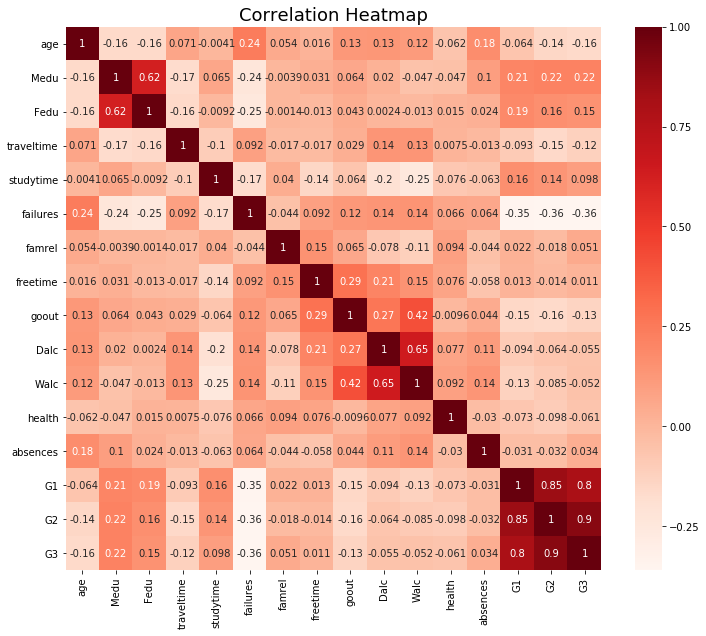

In [9]:
# Correlation
plt.figure(figsize=(12,10));
sns.heatmap(st_mat.corr(), annot=True, cmap="Reds");
plt.title('Correlation Heatmap', fontsize=18)

In [10]:
cors = st_mat.corr(); 
cors.loc[:, "G3"].sort_values(ascending = False).head(10)

G3           1.000000
G2           0.904868
G1           0.801468
Medu         0.217147
Fedu         0.152457
studytime    0.097820
famrel       0.051363
absences     0.034247
freetime     0.011307
Walc        -0.051939
Name: G3, dtype: float64

In [13]:
st_mat.head()
st_mat['FinalGrade'] = 'na'
st_mat.loc[(st_mat.G3 >= 16) & (st_mat.G3 <= 20), 'FinalGrade'] = 'Excellent'
st_mat.loc[(st_mat.G3 >= 11) & (st_mat.G3 <= 15), 'FinalGrade'] = 'Good' 
st_mat.loc[(st_mat.G3 >= 6) & (st_mat.G3 <= 10), 'FinalGrade'] = 'Poor' 
st_mat.loc[(st_mat.G3 >= 0) & (st_mat.G3 <= 5), 'FinalGrade'] = 'Failure' 
st_mat.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,FinalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Poor
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Poor


(0.9048679892693012, 7.62571915404493e-148)

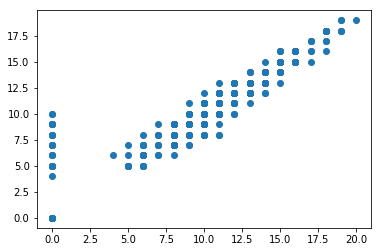

In [14]:
#Highly Correlated and meaningful
X = st_mat['G3']
Y = st_mat['G2']

plt.plot(X,Y, "o")

stats.pearsonr(X,Y)

(0.8014679320174141, 9.001430312276602e-90)

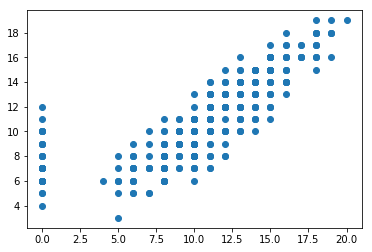

In [15]:
# Highly Correlated and meaningful
X = st_mat['G3']
Y = st_mat['G1']

plt.plot(X,Y, "o")

stats.pearsonr(X,Y)

(0.09781968965319622, 0.05206115462063121)

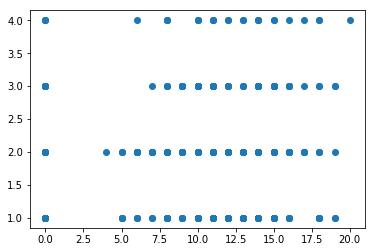

In [16]:

X = st_mat['G3']
Y = st_mat['studytime']

plt.plot(X,Y, "o")

stats.pearsonr(X,Y)

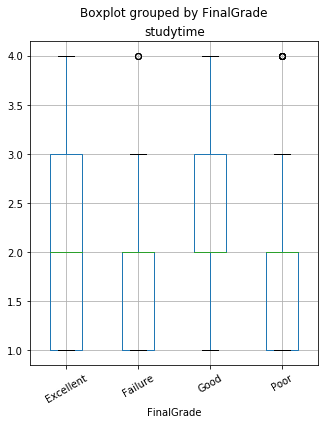

In [26]:
st_mat.boxplot('studytime','FinalGrade',rot = 30,figsize=(5,6))

In [17]:
st_mat_missing = st_mat.isna()
st_mat_missing.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,FinalGrade
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
st_mat_missing.dtypes

school        bool
sex           bool
age           bool
address       bool
famsize       bool
Pstatus       bool
Medu          bool
Fedu          bool
Mjob          bool
Fjob          bool
reason        bool
guardian      bool
traveltime    bool
studytime     bool
failures      bool
schoolsup     bool
famsup        bool
paid          bool
activities    bool
nursery       bool
higher        bool
internet      bool
romantic      bool
famrel        bool
freetime      bool
goout         bool
Dalc          bool
Walc          bool
health        bool
absences      bool
G1            bool
G2            bool
G3            bool
FinalGrade    bool
dtype: object

In [19]:
st_mat_num_missing = st_mat_missing.sum()
st_mat_num_missing

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
FinalGrade    0
dtype: int64

In [20]:
# Find out the percentage of missing data for each attribute.
st_mat_num_missing/len(st_mat)

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
FinalGrade    0.0
dtype: float64

No handles with labels found to put in legend.


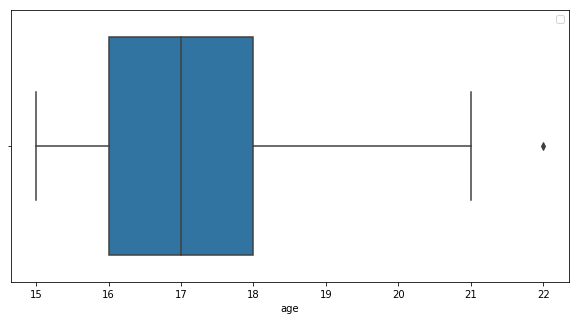

No handles with labels found to put in legend.


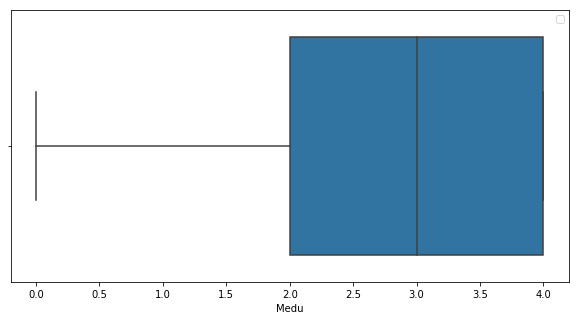

No handles with labels found to put in legend.


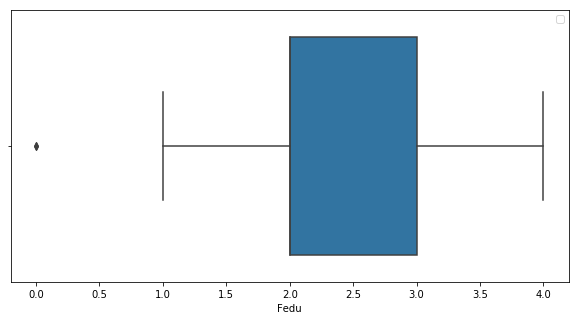

No handles with labels found to put in legend.


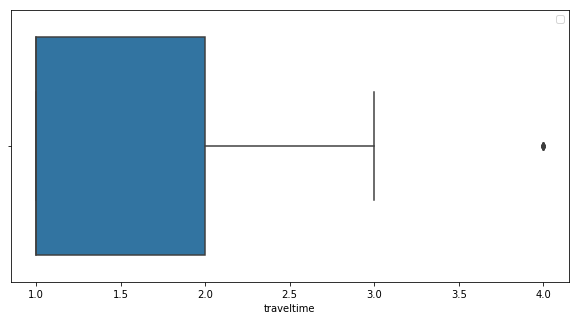

No handles with labels found to put in legend.


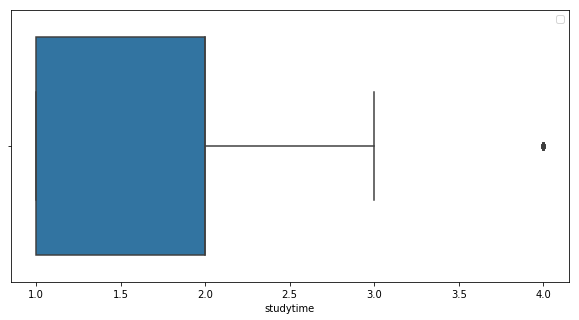

No handles with labels found to put in legend.


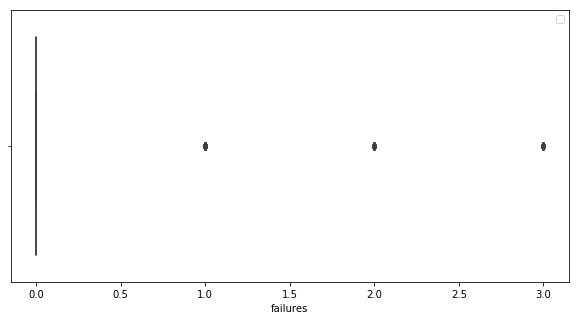

No handles with labels found to put in legend.


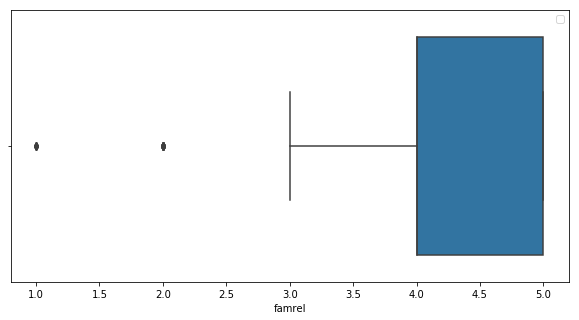

No handles with labels found to put in legend.


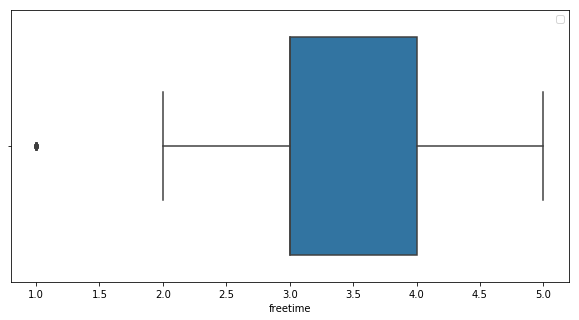

No handles with labels found to put in legend.


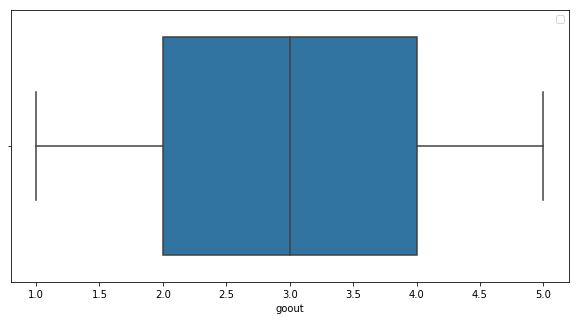

No handles with labels found to put in legend.


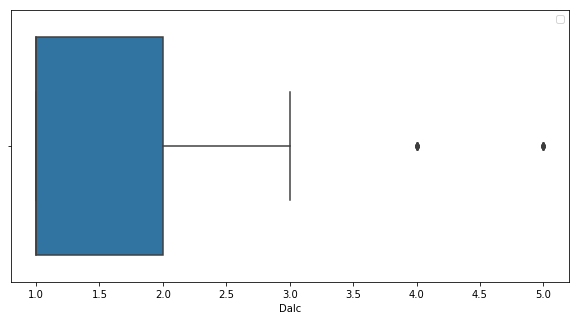

No handles with labels found to put in legend.


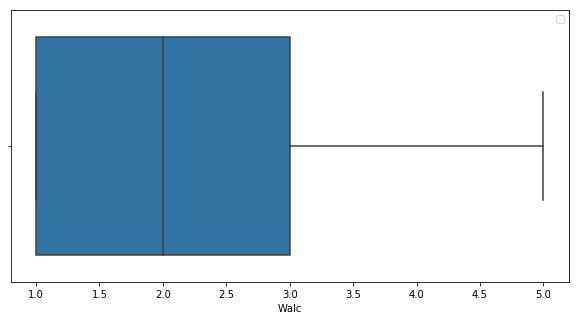

No handles with labels found to put in legend.


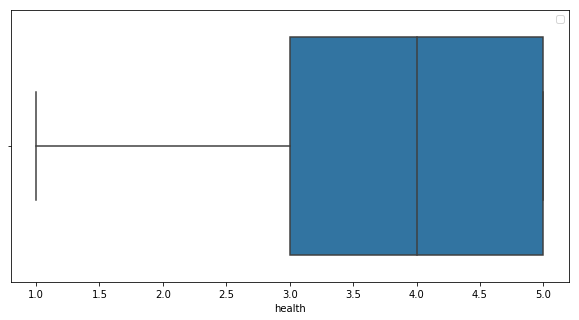

No handles with labels found to put in legend.


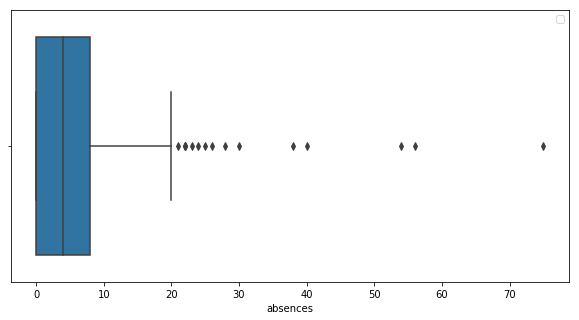

No handles with labels found to put in legend.


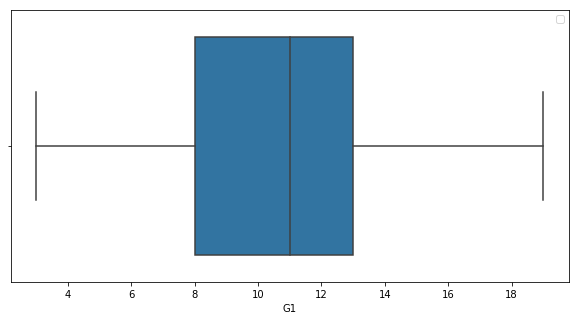

No handles with labels found to put in legend.


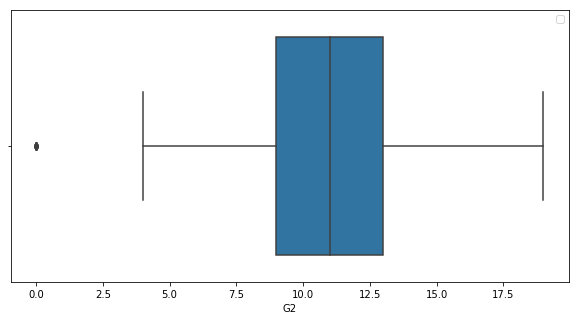

No handles with labels found to put in legend.


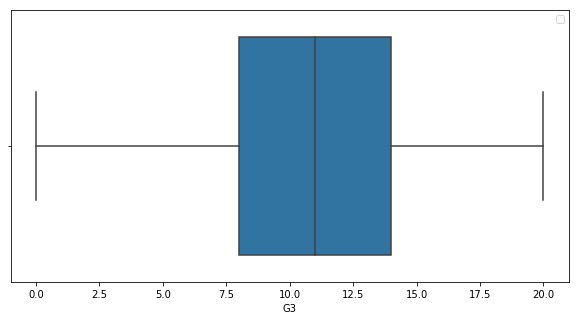

In [21]:
for col in num_cols:
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    fig = plt.figure(figsize=(10, 5))
    
    sns.boxplot(st_mat[col])
    plt.legend()
    plt.show()

C:\Users\burak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


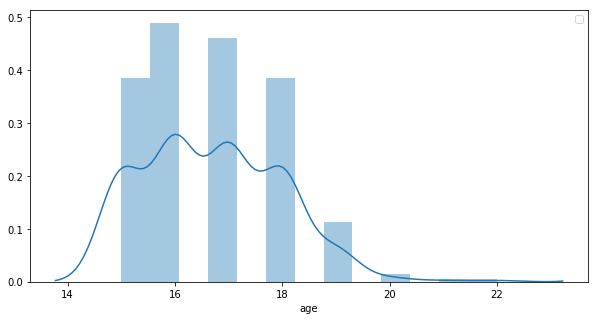

No handles with labels found to put in legend.


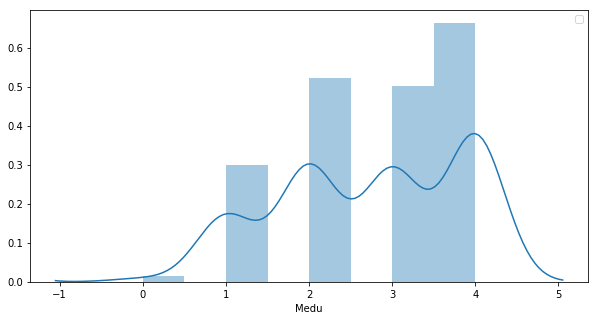

No handles with labels found to put in legend.


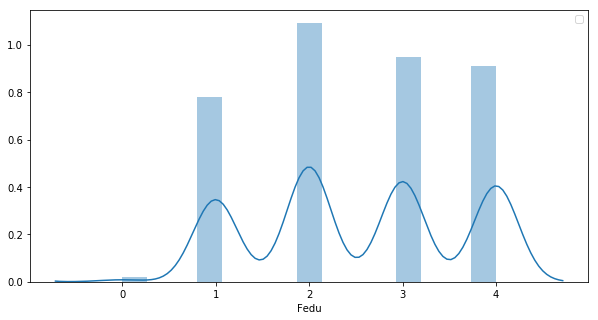

No handles with labels found to put in legend.


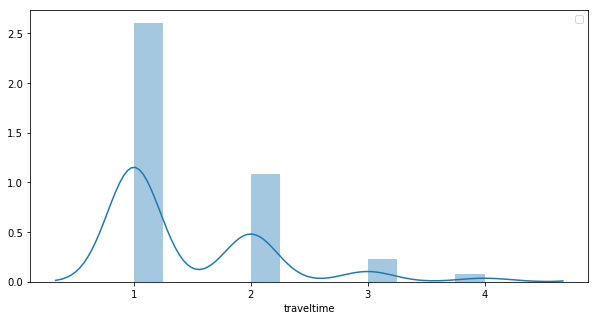

No handles with labels found to put in legend.


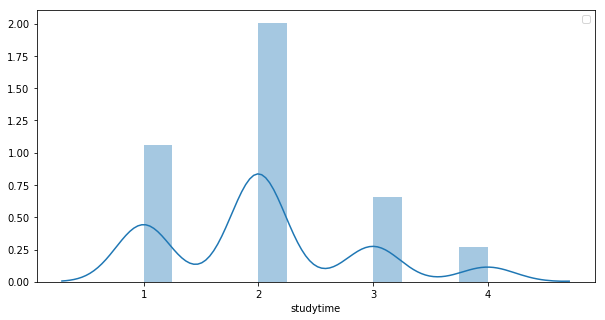

No handles with labels found to put in legend.


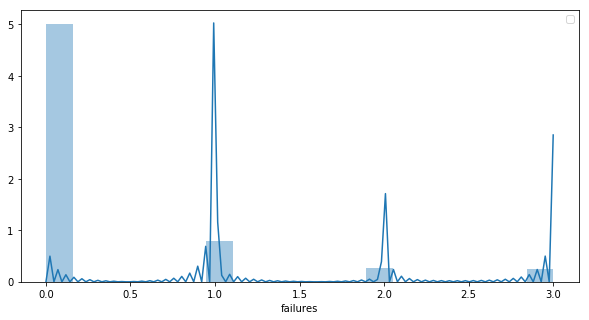

No handles with labels found to put in legend.


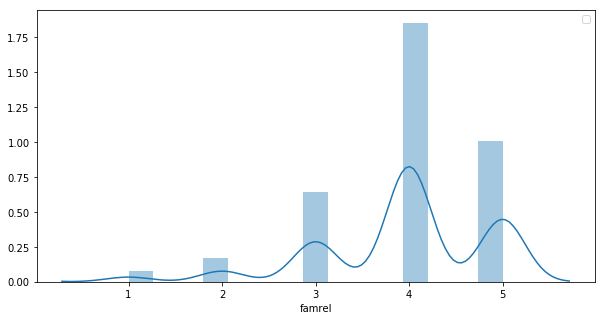

No handles with labels found to put in legend.


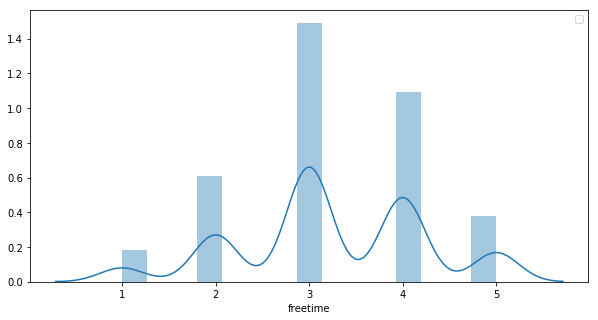

No handles with labels found to put in legend.


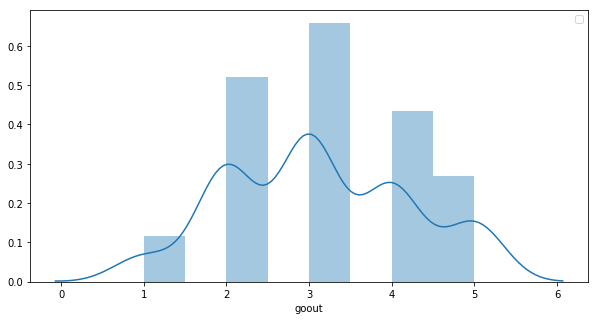

No handles with labels found to put in legend.


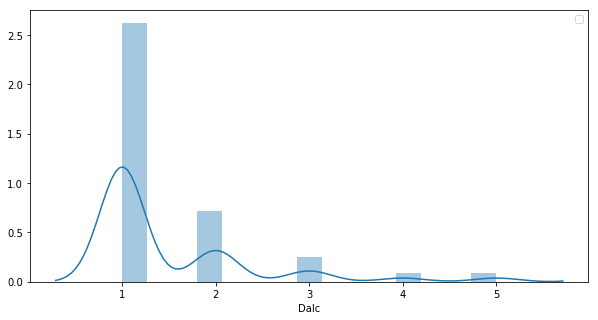

No handles with labels found to put in legend.


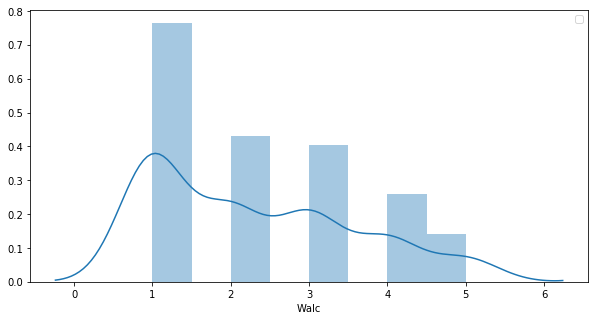

No handles with labels found to put in legend.


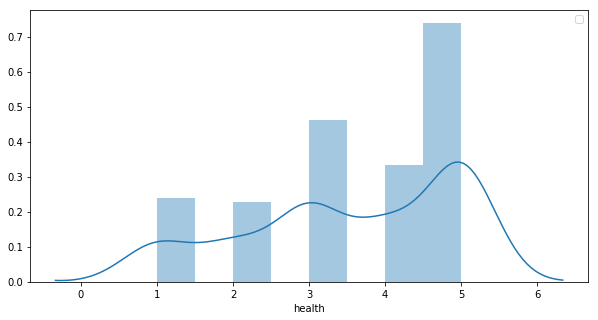

No handles with labels found to put in legend.


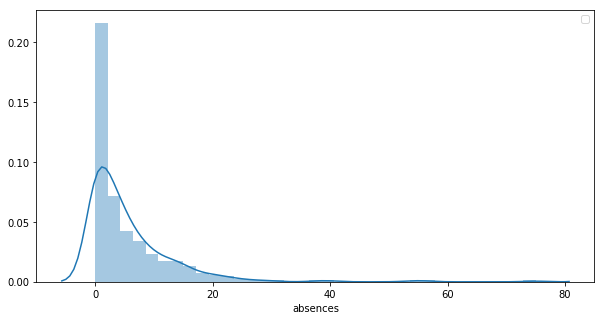

No handles with labels found to put in legend.


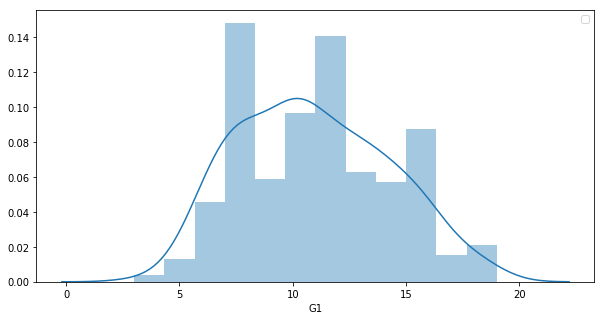

No handles with labels found to put in legend.


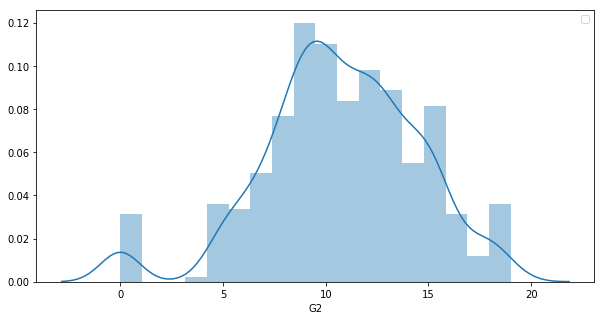

No handles with labels found to put in legend.


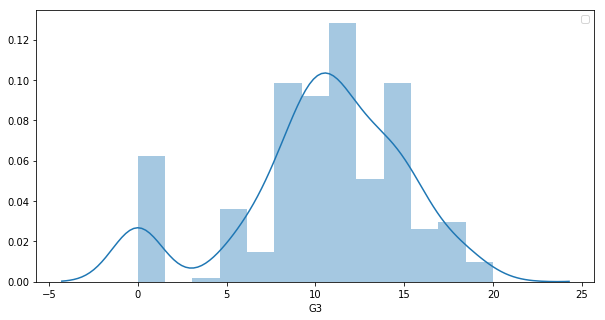

In [22]:
for col in num_cols:
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    fig = plt.figure(figsize=(10, 5))
    
    sns.distplot(st_mat[col])
    plt.legend()
    plt.show()

In [23]:
# Find out duplicate data if there are any.

duplicateRow = st_mat[st_mat.duplicated(subset=None, keep='first')]
print(duplicateRow)

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3, FinalGrade]
Index: []

[0 rows x 34 columns]


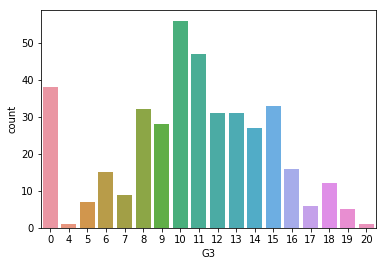

In [24]:
#Distribution of Final Grade
sns.countplot(st_mat["G3"])
plt.show()

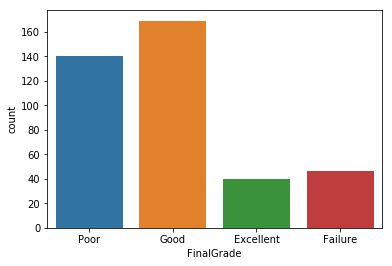

In [27]:
# 16-20 = 'Excellent'
# 11-15 = 'Good' 
# 6-10  = 'Poor' 
# 0-5   = 'Failure' 
sns.countplot(st_mat["FinalGrade"])
plt.show()